In [1]:
from IPython.core.display import HTML
def css_styling():
    return HTML("<style>@import url('https://fonts.googleapis.com/css2?family=Vazirmatn&display=swap'); div {font-family: 'Vazirmatn', sans-serif;}</style>")
css_styling()

<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h1>
        نصب پیش نیازها
    </h1>
    <p dir="rtl" style="text-align: right">
    ما به کتابخانه‌های زیر برای این تمرین نیاز داریم.  
    </p>
    <ul>
        <li>
            <b>hazm</b>: برای پیش‌پردازش متون فارسی
        </li>
        <li>
            <b>tqdm</b>: برای نمایش میزان پیشرفت
        </li>
        <li>
            <b>requests</b>: برای درخواست از سایت‌ها
        </li>
        <li>
            <b>beautifulsoup</b>: برای تجزیه و تحلیل سایت‌ها
        </li>
        <li>
            <b>arabic-reshaper و python-bidi</b>: برای نمایش حروف فارسی در نمودارها
        </li>
    </ul>
</div>


In [2]:
!pip install hazm tqdm requests beautifulsoup4 arabic-reshaper python-bidi


You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h1>
        آماده سازی داده‌ها
    </h1>
    <h2>
        خواندن از گنجور
    </h2>
    <p dir="rtl" style="text-align: right">
        برای این تمرین، ما ابتدا اشعار مثنوی معنوی را که در ۶ دفتر قرار دارند، از سایت گنجور می‌خوانیم. سپس آن‌ها را به صورت بیت به بیت در لیست و هر بیت را به صورت دو مصرع در تاپل ذخیره می‌کنیم.  <br />
      برای خواندن گنجور ابتدا با استفاده از Requests به صفحه هر شعر درخواست می‌زنیم و سپس با استفاده از BeautifulSoup اقدام به تجزیه و تحلیل محتوای آن می‌کنیم.
    </p>
</div>

In [3]:
daftars = [172, 115, 228, 139, 178, 140]


In [4]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm


def get_poem(daftar, poem):
    url = f'https://ganjoor.net/moulavi/masnavi/daftar{daftar}/sh{poem}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    article = soup.find('article', attrs={'id': 'garticle'})
    divs = article.find_all('div', class_='b')
    beyts = []
    for div in divs:
        m1 = div.find('div', class_='m1')
        m2 = div.find('div', class_='m2')
        beyts.append((m1.text, m2.text))
    return beyts


In [5]:
import time

def crawl(daftars):
    poems = []
    for i, daftar in enumerate(daftars):
        print(f'Getting poems from daftar {i + 1}')
        poems.append([])
        for poem in tqdm(range(1, daftar + 1)):
            poems[-1].append(get_poem(i+1, poem))
            time.sleep(0.5)
    return poems


poems = crawl(daftars)


Getting poems from daftar 1


100%|████████████████████████████████████████████████████████████████████████████████| 172/172 [03:46<00:00,  1.32s/it]


Getting poems from daftar 2


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [02:29<00:00,  1.30s/it]


Getting poems from daftar 3


100%|████████████████████████████████████████████████████████████████████████████████| 228/228 [04:52<00:00,  1.28s/it]


Getting poems from daftar 4


100%|████████████████████████████████████████████████████████████████████████████████| 139/139 [02:57<00:00,  1.28s/it]


Getting poems from daftar 5


100%|████████████████████████████████████████████████████████████████████████████████| 178/178 [03:51<00:00,  1.30s/it]


Getting poems from daftar 6


100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [03:01<00:00,  1.30s/it]


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h2>
        ذخیره‌سازی داده‌ها
    </h2>
    <p dir="rtl" style="text-align: right">
      حال با استفاده از pickle اشعار خوانده‌شده را در یک فایل باینری ذخیره می‌کنیم. <br /> 
        در اینجا می‌توانستیم با استفاده از json نیز اشعار را در یک فایل متنی ذخیره کنیم اما فضای بیشتری را اشغال می‌کرد.
    </p>
</div>

In [6]:
import pickle

with open('poems.pkl', 'wb') as f:
    pickle.dump(poems, f)

with open('poems.pkl', 'rb') as f:
    poems = pickle.load(f)


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h2>
        پیش‌پردازش اشعار
    </h2>
    <p dir="rtl" style="text-align: right">
    ابتدا فاصله‌های اضافی اشعار را حذف‌کرده و سپس با استفاده از hazm آن‌ها را Normalize و Lemmatize می‌کنیم. <br />
    در نهایت پس از سمپل‌گیری نسخه Normalized و Stemmed و Lemmatized را با هم مقایسه می‌کنیم.  
    </p>
</div>

In [7]:
import hazm
import re

normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()
stemmer = hazm.Stemmer()
tokenizer = hazm.WordTokenizer(join_verb_parts=False)


def preprocess(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    normalized = normalizer.normalize(text)
    tokens = tokenizer.tokenize(normalized)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return normalized, lemmatized


print(preprocess('من از خانه به کتاب خانه رفته ام و 3 کتاب قرض گرفته ام'))


('من از خانه به کتاب\u200cخانه رفته\u200cام و ۳ کتاب قرض گرفته\u200cام', ['من', 'از', 'خانه', 'به', 'کتاب\u200cخانه', 'رفت#رو', 'و', '۳', 'کتاب', 'قرض', 'گرفت#گیر'])


In [8]:
def normalize_lemmatize(poems):
    normalized_poems = []
    lemmatized_poems = []
    for i, daftar in enumerate(poems):
        print(f'Preprocessing poems from daftar {i + 1}')
        normalized_poems.append([])
        lemmatized_poems.append([])
        for poem in tqdm(daftar):
            normalized_poems[-1].append([])
            lemmatized_poems[-1].append([])
            for beyt in poem:
                m1_normalized, m1_lemmatized = preprocess(beyt[0])
                m2_normalized, m2_lemmatized = preprocess(beyt[1])
                normalized_poems[-1][-1].append((m1_normalized, m2_normalized))
                lemmatized_poems[-1][-1].append((m1_lemmatized, m2_lemmatized))
    return normalized_poems, lemmatized_poems


normalized_poems, lemmatized_poems = normalize_lemmatize(poems)


Preprocessing poems from daftar 1


100%|████████████████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.90it/s]


Preprocessing poems from daftar 2


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [00:01<00:00, 73.37it/s]


Preprocessing poems from daftar 3


100%|███████████████████████████████████████████████████████████████████████████████| 228/228 [00:01<00:00, 120.77it/s]


Preprocessing poems from daftar 4


100%|████████████████████████████████████████████████████████████████████████████████| 139/139 [00:01<00:00, 96.24it/s]


Preprocessing poems from daftar 5


100%|████████████████████████████████████████████████████████████████████████████████| 178/178 [00:01<00:00, 95.69it/s]


Preprocessing poems from daftar 6


100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [00:02<00:00, 65.21it/s]


In [9]:
import random
import pandas as pd


def sample_beyts(poems, normalized_poems, lemmatized_poems, is_beyts=True):
    beyts = random.choices(
        list(zip(poems[0][0], normalized_poems[0][0], lemmatized_poems[0][0])), k=5)
    new_beyts = []
    for beyt in beyts:
        if is_beyts:
            new_beyts.append((beyt[0][0], beyt[1][0], [stemmer.stem(
                token) for token in tokenizer.tokenize(beyt[1][0])], beyt[2][0]))
            new_beyts.append((beyt[0][1], beyt[1][1], [stemmer.stem(
                token) for token in tokenizer.tokenize(beyt[1][1])], beyt[2][1]))
        else:
            new_beyts.append((beyt[0][0], beyt[1][0], [stemmer.stem(
                token) for token in tokenizer.tokenize(beyt[1][0])], beyt[2]))
    return pd.DataFrame(new_beyts, columns=['Original', 'Normalized', 'Stemmed', 'Lemmatized'])


sample_beyts(poems, normalized_poems, lemmatized_poems)


,Original,Normalized,Stemmed,Lemmatized
0,در نیابد حال پخته هیچ خام,در نیابد حال پخته هیچ خام,"[در, نیابد, حال, پخته, هیچ, خا]","[در, یافت#یاب, حال, پخته, هیچ, خام]"
1,پس سخن کوتاه باید و السلام,پس سخن کوتاه باید و السلام,"[پس, سخن, کوتاه, باید, و, السلا]","[پس, سخن, کوتاه, باید, و, السلام]"
2,هر که جز ماهی ز آبش سیر شد,هر که جز ماهی ز آبش سیر شد,"[هر, که, جز, ماه, ز, آب, سیر, شد]","[هر, که, جز, ماه, ز, آب, سیر, شد#شو]"
3,هرکه بی روزیست روزش دیر شد,هرکه بی روزیست روزش دیر شد,"[هرکه, ب, روزیس, روز, دیر, شد]","[هرکه, بی, روزیست, روز, دیر, شد#شو]"
4,گر بریزی بحر را در کوزه‌ای,گر بریزی بحر را در کوزه‌ای,"[گر, بریز, بحر, را, در, کوزه]","[گر, ریخت#ریز, بحر, را, در, کوزه]"
5,چند گنجد قسمت یک روزه‌ای,چند گنجد قسمت یک روزه‌ای,"[چند, گنجد, قسم, یک, روزه]","[چند, گنجد, قسمت, یک, روزه]"
6,گر بریزی بحر را در کوزه‌ای,گر بریزی بحر را در کوزه‌ای,"[گر, بریز, بحر, را, در, کوزه]","[گر, ریخت#ریز, بحر, را, در, کوزه]"
7,چند گنجد قسمت یک روزه‌ای,چند گنجد قسمت یک روزه‌ای,"[چند, گنجد, قسم, یک, روزه]","[چند, گنجد, قسمت, یک, روزه]"
8,محرم این هوش جز بیهوش نیست,محرم این هوش جز بیهوش نیست,"[محر, این, هو, جز, بیهو, نیس]","[محرم, این, هوش, جز, بیهوش, نیست]"
9,مر زبان را مشتری جز گوش نیست,مر زبان را مشتری جز گوش نیست,"[مر, زب, را, مشتر, جز, گو, نیس]","[مر, زبان, را, مشتری, جز, گوش, نیست]"


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h1>
        تحلیل کلمات
    </h1>
    <h2>
        بررسی کلمات پرتکرار
    </h2>
    <p dir="rtl" style="text-align: right">
    ابتدا توکن‌ها را در کنار یکدیگر قرار می‌دهیم، سپس تحلیل فرکانسی کلمات را بدست میاوریم و کلمات پرتکرار آن را نمایش می‌دهیم. 
    </p>

</div>

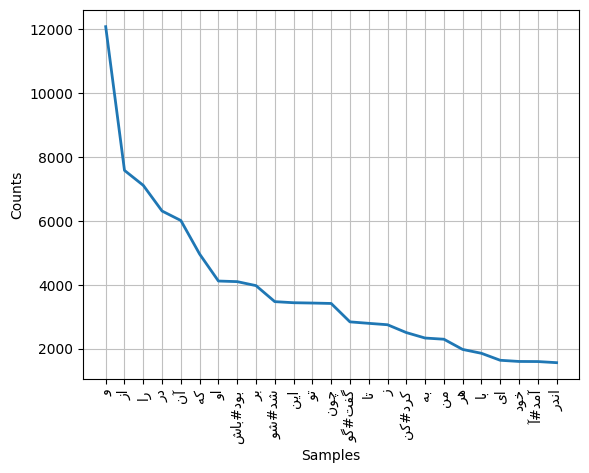

Total Tokens: 311463
Unique Tokens: 20181
سعدی Frequnecy: 3


In [10]:
from nltk import FreqDist
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display


def flatten_tokens(lemmatized_poems):
    total_tokens = []
    for daftar in lemmatized_poems:
        for poem in daftar:
            for beyt in poem:
                total_tokens.extend(beyt[0])
                total_tokens.extend(beyt[1])
    return total_tokens


def plot_word_frequency(total_tokens):
    fd = FreqDist(total_tokens)
    ax = fd.plot(25, show=False)
    labels = ax.get_xticklabels()
    new_labels = []
    for label in labels:
        new_labels.append(get_display(
            arabic_reshaper.reshape(label.get_text())))
    ax.set_xticklabels(new_labels)
    plt.show()
    return fd


total_tokens = flatten_tokens(lemmatized_poems)
fd = plot_word_frequency(total_tokens)
print('Total Tokens:', fd.N())
print('Unique Tokens:', fd.B())
print('سعدی', 'Frequnecy:', fd['سعدی'])


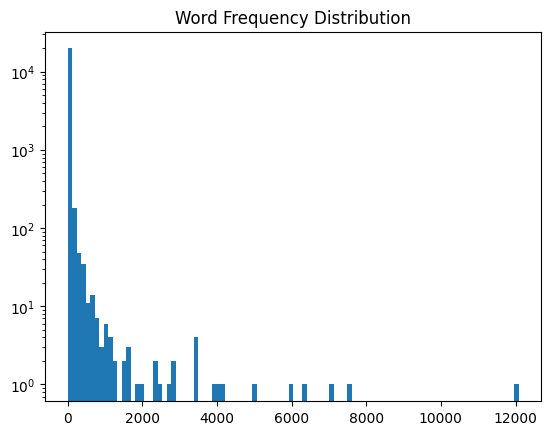

In [11]:
plt.hist(fd.values(), bins=100)
plt.gca().set_yscale("log")
plt.title('Word Frequency Distribution')
plt.show()


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h2>
    به‌دست آوردن بیت نماینده هر شعر
    </h2>
    <p dir="rtl" style="text-align: right">
        برای تحلیل یکتایی و کمیاب‌بودن هر بیت که فرض می‌گیریم ارتباط خوبی با نمایندگی هر شعر دارد ما از معیار پیچیدگی(perplexity) استفاده می‌کنیم. <br />
        این فرض براین پایه است که اگر ترکیب خاصی از کلمات تنها در یک بیت از کل مثنوی آمده باشند، این بیت می‌تواند نماینده این شعر در مثنوی باشد.
    </p>
    <p dir="rtl" style="text-align: right">
        ابتدا این معیار را برای تمامی ابیات محاسبه می‌کنیم و سپس به عنوان مثال به نتایج آن در اولین شعر اولین دفتر مثنوی معنوی که همان شعر معروف «بشنو از نی چون حکایت می‌کند» است دقت می‌کنیم.
    </p>
</div>

In [12]:
def sentence_perplexity(fd, sentence):
    p = 1
    for word in sentence:
        if fd[word] == 0:
            continue
        p *= fd[word] / fd.N()
    p = p ** (-1 / len(sentence))
    if p > 1e6:
        return float('inf')
    return p


In [13]:
def get_poem_representatives(fd, poems, lemmatized_poems):
    poem_representatives = []
    for i, daftar in enumerate(lemmatized_poems):
        poem_representatives.append([])
        for j, poem in enumerate(daftar):
            poem_representatives[-1].append([])
            for k, beyt in enumerate(poem):
                perplexity = sentence_perplexity(fd, beyt[0] + beyt[1])
                poem_representatives[-1][-1].append(
                    (perplexity, poems[i][j][k], lemmatized_poems[i][j][k]))
            poem_representatives[-1][-1].sort(reverse=True)
    return poem_representatives


def report_poem_representative(fd, poem_representatives):
    for perplexity, beyt, lemmatized_poem in poem_representatives[0][0]:
        print(f'Perplexity: {perplexity:.4f}')
        print('Original:', beyt[0], beyt[1])
        for word in lemmatized_poem[0] + lemmatized_poem[1]:
            print(word, fd[word])
        print('-' * 50)


poem_representatives = get_poem_representatives(fd, poems, lemmatized_poems)
report_poem_representative(fd, poem_representatives)


Perplexity: 7245.3637
Original: با لب دمساز خود گر جفتمی همچو نی من گفتنی‌ها گفتمی
با 1859
لب 195
دمساز 4
خود‌گر 6
جفتمی 1
همچو 315
نی 263
من 2300
گفتنی‌ها 1
گفتمی 13
--------------------------------------------------
Perplexity: 3254.3972
Original: آینه‌ت دانی چرا غماز نیست زآن که زنگار از رخش ممتاز نیست
آینه 63
دانست#دان 584
چرا 161
غماز 21
نیست 1123
زآن 2
که 4964
زنگار 5
از 7583
رخش 10
ممتاز 1
نیست 1123
--------------------------------------------------
Perplexity: 3158.3075
Original: عشق، جانِ طور آمد عاشقا! طور، مست و خرَّ موسی صَاعِقا
عشق 358
، 166
جان 1524
طور 18
آمد#آ 1601
عاشقا 3
! 2
طور 18
، 166
مست 241
و 12081
خر 302
موسی 200
صاعقا 1
--------------------------------------------------
Perplexity: 2826.4640
Original: آتش عشق است کاندر نی فتاد جوشش عشق است کاندر می فتاد
آتش 398
عشق 358
#است 416
کاندر 42
نی 263
فتاد 74
جوشش 12
عشق 358
#است 416
کاندر 42
می‌فتاد 8
--------------------------------------------------
Perplexity: 1923.0454
Original: سینه خواهم شرحه شرحه از فراق تا بگو

<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h2>
        پاک‌سازی اشعار
    </h2>
    <p dir="rtl" style="text-align: right">
        با تحلیل پیچیدگی اشعاری که در صدر قرار دارند به این نتیجه می‌رسیم که میزانی خطا به خاطر کهن‌بودن متن و عدم‌توانایی تحلیل درست آن از سمت hazm وجود دارد.
        میزان دیگری از خطا به خاطر وجود کلمات پرتکراری که در نمودار بالا دیدیم در اشعاری که به نظر می‌آمدند که نماینده بهتری هستند می‌باشد.
    </p>
    <p dir="rtl" style="text-align: right">
      برای بررسی این فرضیه ما اقدام به پاکسازی 25 کلمه پرتکرار از اشعار کردیم و سپس با تکرار فرایند قبلی نماینده‌های اشعار را بدست آوردیم.
        متوجه می‌شویم که نماینده‌های جدید برای ما آشناتر هستند و می‌تواند معیار بهتری برای تشخیص شعر باشد.
    </p>
</div>

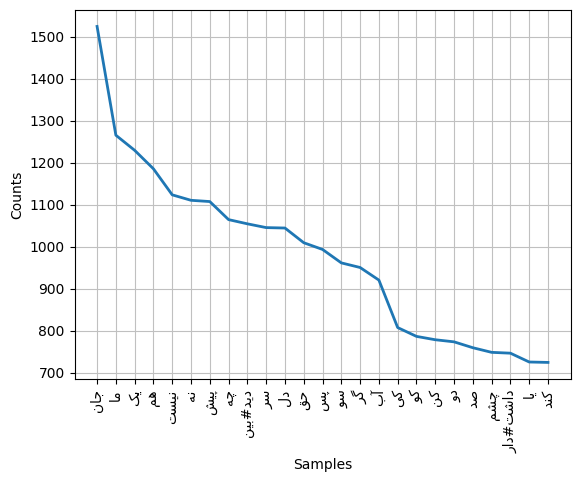

Perplexity: 30847.3299
Original: من به هر جمعیتی نالان شدم جفت بدحالان و خوش‌حالان شدم
جمعیت 13
نالان 12
جفت 107
بدحال 1
خوش‌حال 1
--------------------------------------------------
Perplexity: 13210.2889
Original: با لب دمساز خود گر جفتمی همچو نی من گفتنی‌ها گفتمی
لب 195
دمساز 4
خود‌گر 6
جفتمی 1
همچو 315
نی 263
گفتنی‌ها 1
گفتمی 13
--------------------------------------------------
Perplexity: 7240.2333
Original: بشنو این نی چون شکایت می‌کند از جدایی‌ها حکایت می‌کند
بشنو 60
نی 263
شکایت 15
جدایی 3
حکایت 33
--------------------------------------------------
Perplexity: 5651.5347
Original: ای دوای نخوت و ناموس ما ای تو افلاطون و جالینوس ما
دوا 44
نخوت 8
ناموس 19
ما 1265
افلاطون 1
جالینوس 11
ما 1265
--------------------------------------------------
Perplexity: 5178.0167
Original: آینه‌ت دانی چرا غماز نیست زآن که زنگار از رخش ممتاز نیست
آینه 63
دانست#دان 584
چرا 161
غماز 21
نیست 1123
زآن 2
زنگار 5
رخش 10
ممتاز 1
نیست 1123
--------------------------------------------------
Perplexity: 4398

In [14]:
def get_clean_poems(fd, lemmatized_poems):
    stopwords = fd.most_common(25)
    stopwords = [word[0] for word in stopwords]
    cleaned_poems = []
    for daftar in lemmatized_poems:
        cleaned_poems.append([])
        for poem in daftar:
            cleaned_poems[-1].append([])
            for beyt in poem:
                cleaned_poems[-1][-1].append(([], []))
                for word in beyt[0]:
                    if word not in stopwords:
                        cleaned_poems[-1][-1][-1][0].append(word)
                for word in beyt[1]:
                    if word not in stopwords:
                        cleaned_poems[-1][-1][-1][1].append(word)
    return cleaned_poems


cleaned_poems = get_clean_poems(fd, lemmatized_poems)
cleaned_total_tokens = flatten_tokens(cleaned_poems)
cleaned_fd = plot_word_frequency(cleaned_total_tokens)
poem_representatives = get_poem_representatives(
    cleaned_fd, poems, cleaned_poems)
report_poem_representative(cleaned_fd, poem_representatives)


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h1>
        استخراج کلمات کلیدی
    </h1>
    <h2>
        تعیین نقش کلمات
    </h2>
    <p dir="rtl" style="text-align: right">
        ابتدا با استفاده از مدل ازپیش‌آموزش‌دیده(pretrained) ابزار POSTagger اقدام به تعیین نقش کلمات در جملات توکنیزه شده می‌کنیم.
        در اینجا ما فرض می‌کنیم که هر بیت از تعدادی جمله تشکیل شده و جملات در بین ابیات ادامه ندارند. <br />
        سپس پس از تعیین نقش تمامی کلمات تمامی ابیات اقدام به نمایش تعدادی از آن‌ها و تحلیل میزان صحت آن‌ها می‌کنیم.
    </p>
</div>

In [15]:
tagger = hazm.POSTagger(model='pos_tagger.model')


def get_tagged_poems(normalized_poems):
    tagged_poems = []
    for i, daftar in enumerate(normalized_poems):
        tagged_poems.append([])
        print(f'tagging poems of daftar {i + 1}')
        for poem in tqdm(daftar):
            tagged_poems[-1].append([])
            for beyt in poem:
                tokens = [tokenizer.tokenize(
                    txt) for txt in hazm.sent_tokenize(beyt[0] + ' ' + beyt[1])]
                tagged_poems[-1][-1].append(tagger.tag_sents(tokens))
    return tagged_poems


tagged_poems = get_tagged_poems(normalized_poems)
sample_beyts(poems, normalized_poems, tagged_poems, False)


tagging poems of daftar 1


100%|███████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 215.66it/s]


tagging poems of daftar 2


100%|███████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 138.32it/s]


tagging poems of daftar 3


100%|███████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 249.91it/s]


tagging poems of daftar 4


100%|███████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 166.58it/s]


tagging poems of daftar 5


100%|███████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 204.59it/s]


tagging poems of daftar 6


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 141.27it/s]


,Original,Normalized,Stemmed,Lemmatized
0,بند بگسل باش آزاد ای پسر,بند بگسل باش آزاد‌ای پسر,"[بند, بگسل, با, آزاد, پسر]","[[(بند, NOUN,EZ), (بگسل, NOUN), (باش, VERB), (..."
1,هر که جز ماهی ز آبش سیر شد,هر که جز ماهی ز آبش سیر شد,"[هر, که, جز, ماه, ز, آب, سیر, شد]","[[(هر, DET), (که, NOUN), (جز, ADP), (ماهی, NOU..."
2,هر کسی از ظن خود شد یار من,هر کسی از ظن خود شد یار من,"[هر, کس, از, ظن, خود, شد, یار, من]","[[(هر, DET), (کسی, NOUN), (از, ADP), (ظن, NOUN..."
3,کز نیستان تا مرا ببریده‌اند,کز نیستان تا مرا ببریده‌اند,"[کز, نیس, تا, مرا, ببریده‌اند]","[[(کز, ADP), (نیستان, NOUN), (تا, SCONJ), (مرا..."
4,ای دوای نخوت و ناموس ما,ای دوای نخوت و ناموس ما,"[ا, دوا, نخو, و, ناموس, ما]","[[(ای, INTJ), (دوای, NOUN,EZ), (نخوت, NOUN), (..."


In [16]:
tagged_poems[0][0][0]


[[('بشنو', 'VERB'),
  ('این', 'DET'),
  ('نی', 'NOUN'),
  ('چون', 'ADV'),
  ('شکایت', 'NOUN'),
  ('می\u200cکند', 'VERB'),
  ('از', 'ADP'),
  ('جدایی\u200cها', 'NOUN'),
  ('حکایت', 'NOUN'),
  ('می\u200cکند', 'VERB')]]

<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h2>
        استخراج ترکیب‌های وصفی و اضافی
    </h2>
    <p dir="rtl" style="text-align: right">
        ابتدا دو قالب اضافی و وصفی را به صورت ترکیب دو اسم پشت سر هم یا یک اسم و یک صفت متوالی تعریف می‌کنیم.(در اینجا از ترکیب های
        وصفی مغلوب صرف نظر می‌کنیم). <br />
        سپس با استفاده از ابزار RegexParser از کتابخانه nltk اقدام به ساخت درخت تجزیه و جداسازی ترکیب‌های وصفی و اضافی می‌کنیم.
    </p>
</div>

In [17]:
from nltk import RegexpParser

grammers = [
    """
NP:
        {<NOUN,EZ><NOUN.*>}    # Noun(s) + Noun(optional)

""",

    """
NP:
        {<NOUN.*><ADJ.*>}    # Noun(s) + Adjective(optional)

"""
]


def extract_candidates(tagged, grammer):
    keyphrase_candidate = set()
    np_parser = RegexpParser(grammer)
    trees = np_parser.parse_sents(tagged)
    for tree in trees:
        for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
            keyphrase_candidate.add(
                ' '.join(word for word, tag in subtree.leaves()))
    keyphrase_candidate = {
        kp for kp in keyphrase_candidate if len(kp.split()) <= 5}
    keyphrase_candidate = list(keyphrase_candidate)
    return keyphrase_candidate


def extract_poem_candidates(tagged_poem, grammers):
    all_candidates = set()
    total_tokens = []
    for beyt in tagged_poem:
        total_tokens.extend(beyt)
    all_candidates = set()
    for grammer in grammers:
        all_candidates.update(extract_candidates(total_tokens, grammer))
    return all_candidates


candidates = []
for i, daftar in enumerate(tagged_poems):
    candidates.append([])
    print(f'extracting candidates from daftar {i + 1}')
    for poem in tqdm(daftar):
        candidates[-1].append(extract_poem_candidates(poem, grammers))


extracting candidates from daftar 1


100%|███████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 548.01it/s]


extracting candidates from daftar 2


100%|███████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 435.27it/s]


extracting candidates from daftar 3


100%|███████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 569.10it/s]


extracting candidates from daftar 4


100%|███████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 384.96it/s]


extracting candidates from daftar 5


100%|███████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 481.45it/s]


extracting candidates from daftar 6


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 317.35it/s]


In [18]:
print('\n'.join(sorted(candidates[0][0], key=lambda x: sentence_perplexity(
    fd, tokenizer.tokenize(x)), reverse=True)))


رخش ممتاز
شرحه شرحه
بی‌پر وای
بند بگسل
صدف قانع
لب دمساز
روزگار وصل
نی دمساز
عیب کلی
سخن کوتاه
بند سیم
تن مستور
جوشش عشق
حدیث راه
طبیب جمله
شرح درد
بند زر
سخن بیرون
خر موسی
جسم خاک
آتش عشق
عشق خوش
راه پر
درگذشت نشنوی
روزها بیگاه
دوای نخوت
جمعیتی نالان
جفت بدحالان
پرده‌ای زنده
قصه‌های عشق
نور یارم
حریصان پر
کوزه‌ی چشم
سر گذشت


<link href="styles.css" rel="stylesheet">
<div dir="rtl" style="text-align: right">
    <h2>
        جداسازی کلمات کلیدی 
    </h2>
    <p dir="rtl" style="text-align: right">
        ترکیب های وصفی و اضافی انتخاب شده را برحسب پیچیدگی کلمات مرتب می‌کنیم تا به نوعی کلمات کلیدی شعر را استخراج کرده باشیم چرا که
        این کلمات در بقیه اشعار کمیاب‌ترند و بهتر مفهوم خاص این شعر را نسبت به بقیه اشعار بیان می‌کنند.
    </p>
</div>

</body>
</html>